# Explore here

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv', sep=';')
total_data.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
import pandas as pd
import numpy as np

# Cargar dataset
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv', sep=';')

# Definición de condiciones para la columna 'label'
conditions = [
    total_data['quality'].isin([3, 4]),
    total_data['quality'].isin([5, 6]),
    total_data['quality'].isin([7, 8])
]

# Valores correspondientes para cada condición
values = [0, 1, 2]

# Crear la columna 'label' usando np.select
total_data['label'] = np.select(conditions, values, default=-1)

# Opcional: mostrar primeros registros para verificar
print(total_data[['quality', 'label']].head(10))



   quality  label
0        5      1
1        5      1
2        5      1
3        6      1
4        5      1
5        5      1
6        5      1
7        7      2
8        7      2
9        5      1


In [16]:
total_data.drop(["quality"], axis = 1, inplace = True)
total_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
1090,10.0,0.260,0.54,1.90,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,2
337,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.3,1
964,8.5,0.470,0.27,1.90,0.058,18.0,38.0,0.99518,3.16,0.85,11.1,1
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,0
393,8.4,0.665,0.61,2.00,0.112,13.0,95.0,0.99700,3.16,0.54,9.1,1
303,7.4,0.670,0.12,1.60,0.186,5.0,21.0,0.99600,3.39,0.54,9.5,1
669,11.3,0.340,0.45,2.00,0.082,6.0,15.0,0.99880,2.94,0.66,9.2,1
972,10.1,0.380,0.50,2.40,0.104,6.0,13.0,0.99643,3.22,0.65,11.6,2
280,11.4,0.260,0.44,3.60,0.071,6.0,19.0,0.99860,3.12,0.82,9.3,1
462,11.0,0.260,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,1


In [17]:
X = total_data.drop("label", axis = 1)
y = total_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.815625

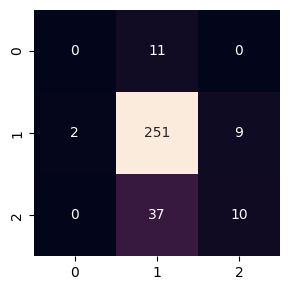

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [22]:
## Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.84      0.96      0.89       262
           2       0.53      0.21      0.30        47

    accuracy                           0.82       320
   macro avg       0.46      0.39      0.40       320
weighted avg       0.76      0.82      0.78       320



k=1 Accuracy=0.8125
k=2 Accuracy=0.7812
k=3 Accuracy=0.7937
k=4 Accuracy=0.8219
k=5 Accuracy=0.8156
k=6 Accuracy=0.8094
k=7 Accuracy=0.8063


k=8 Accuracy=0.8094
k=9 Accuracy=0.8031
k=10 Accuracy=0.8000
k=11 Accuracy=0.8125
k=12 Accuracy=0.8031
k=13 Accuracy=0.8031
k=14 Accuracy=0.8094
k=15 Accuracy=0.8125
k=16 Accuracy=0.8063
k=17 Accuracy=0.8094
k=18 Accuracy=0.8125
k=19 Accuracy=0.8094
k=20 Accuracy=0.8094


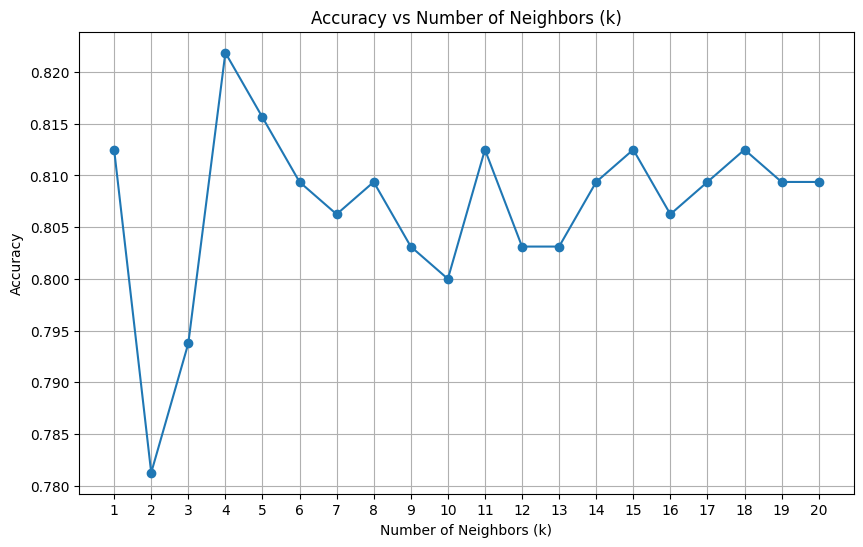

In [23]:

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k} Accuracy={acc:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()




In [24]:
# Función para predecir calidad
def predict_wine_quality(features):
    
    import numpy as np
    features_arr = np.array(features).reshape(1, -1)  
    prediction = knn.predict(features_arr)[0]
    return prediction